<a href="https://colab.research.google.com/github/Erick88santos/mineracao-dados/blob/main/classificacao_bodyPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Body Performance**

##Classificando a base de dados da [Kaggle](https://www.kaggle.com/datasets/kukuroo3/body-performance-data). Em qual idade existe maior índice de massa gorda em Homens e Mulheres.

####**Alunos**:Erick Santos e Talles Ian

In [ ]:
!pip install xlrd==1.2.0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import pandas as pd
import seaborn as sns
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.experimental import (
    enable_iterative_imputer,
)

from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)

In [ ]:
df = pd.read_csv('bodyPerformance.csv')

In [ ]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


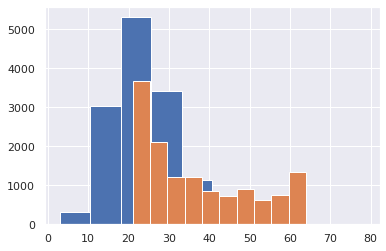

In [101]:
plt.hist(x = df['body fat_%']);
plt.hist(x = df['age']);


#Eliminação das  colunas desnecessárias.

In [ ]:
df = df.drop(columns=['gripForce','sit-ups counts','broad jump_cm','sit and bend forward_cm','diastolic','systolic'])


In [ ]:
df

,age,gender,height_cm,weight_kg,body fat_%,class
0,27.0,M,172.3,75.24,21.3,C
1,25.0,M,165.0,55.80,15.7,A
2,31.0,M,179.6,78.00,20.1,C
3,32.0,M,174.5,71.10,18.4,B
4,28.0,M,173.8,67.70,17.1,B
...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,C
13389,21.0,M,179.7,63.90,12.1,D
13390,39.0,M,177.2,80.50,20.1,A
13391,64.0,F,146.1,57.70,40.4,D


#Análise Exploratória

In [ ]:
df.describe()

,age,height_cm,weight_kg,body fat_%
count,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165
std,13.625639,8.426583,11.949666,7.256844
min,21.000000,125.000000,26.300000,3.000000
25%,25.000000,162.400000,58.200000,18.000000
50%,32.000000,169.200000,67.400000,22.800000
75%,48.000000,174.800000,75.300000,28.000000
max,64.000000,193.800000,138.100000,78.400000


#Verificando os tipos dos dados, afim de evitar erros dentro do código.

In [ ]:
df.corr()

,age,height_cm,weight_kg,body fat_%
age,1.000000,-0.293980,-0.099966,0.242302
height_cm,-0.293980,1.000000,0.734909,-0.515440
weight_kg,-0.099966,0.734909,1.000000,-0.084065
body fat_%,0.242302,-0.515440,-0.084065,1.000000


#Fazendo a correlação entre as informações, nesse momento, **superficialmente** , dá para se ter uma noção de como se comporta as tendências da base

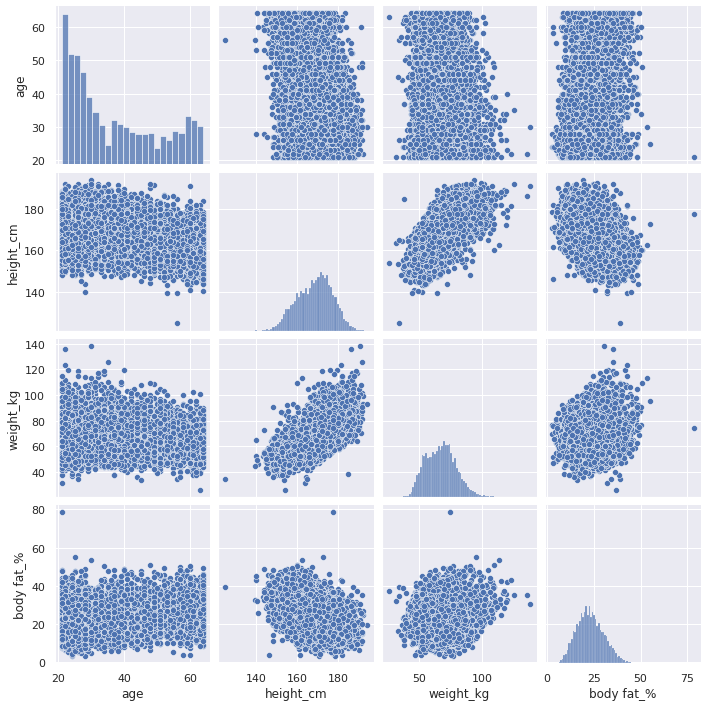

In [ ]:
ax = sns.pairplot(df)

#Visualizando uma correlação entre as nossas informações

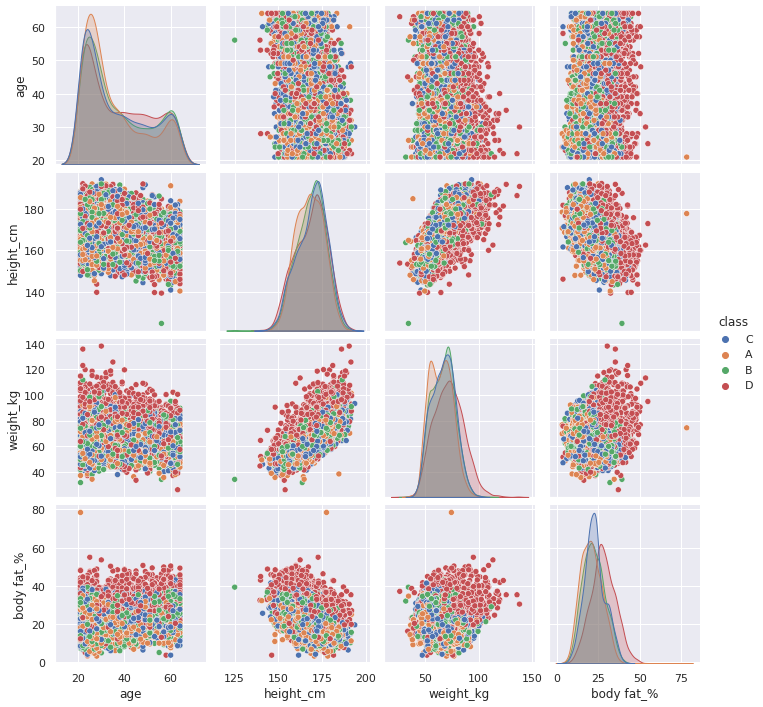

In [ ]:
ax = sns.pairplot(df, hue='class')

#Separação de correlação
##Idade e percentual de gordura das pessoas

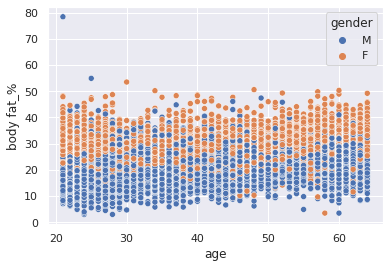

In [ ]:
sns.scatterplot(x='age',y='body fat_%',data=df, hue='gender')
plt.show()

##Percebe-se que os homens desenvolve massa gorda a partir do 10 anos de idade e diminui chegando entre 23 a 25 anos. 

##As mulheres já desenvolvem massa gorda após os 23 a 25 anos.